#  Анализ номинативных данных

In [71]:
from IPython.display import Image

In [72]:
import statistics
import seaborn as sns
import statsmodels.api as sm

import statsmodels.formula.api as smf
# import statsmodels.formula.api as sf

from scipy import stats
from numpy import random

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

import pandas as pd

import numpy as np
import random
random.seed(9001)

In [74]:
from itertools import combinations
import math

<div class="alert alert-warning">
<h2> Постановка задачи </h2>

</div>

 - если две перенные количественные: корреляция, регрессия
 - если одна номинативная, а другая колличесвенная: то есть при сравнии групп разумно использовать t-тест и дисперсионный анализ

Для номинальной переменной строим распределение сколько раз встречалась та или иная градачия номинативной перменнйо

In [75]:
x = np.random.randint(1, 60, size=(60))
y = [random.choice(['A', 'B', 'C']) for i in range(60)]
df = pd.DataFrame({'x': x, 'y': y})

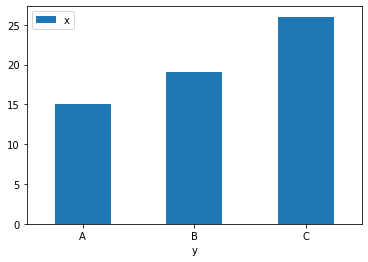

In [76]:
df.pivot_table(index ='y', values = 'x', aggfunc = 'count') \
  .reset_index().plot(kind = 'bar', x = 'y')
plt.xticks(rotation = 0)
plt.show()

**Гитотеза:** импирическое распределение частот в выборки отличается от некоторого заданного РАВНОМЕРНОГО

<div class="alert alert-warning">
<h2> Расстояние Пирсона </h2>

</div>

[Статья](http://bioinformatics.ru/Data-Analysis/Pearson_chisquare_distance.html)

H0: Распределение частот не отличимо от ожидаемого

H1: Распределение частот отличимо от ожидаемого

Задача: Определить, насколько статистически значимы различия между ожидаемыми и эмпирическими значениями


Расстояние Хи-квадрат:

$$χ² ={(\frac{∑(O_i - E_i)}{\sqrt{(E_i}})^{2}} = \frac{∑(O_i - E_i)^{2}}{E_i}$$

нормируем на корень так как пирсон доказал, что при верной нулевой гитотезе флуктуация наблюдаемого знаечния относительно ожидаемого значения частоты пропорциональна квадрату 

где  значения $O_i$ (Observed) - наблюдаемые частоты, $E_i$ (Expexted) - ожидаемые частоты.

**Проверка монетки на четность:**
 - нулевая гипотеза вероятности раные 0.5
 - прейти к оценке частоты номинативной перемнной

In [77]:
eagle = 40 
tails = 20
N = eagle + tails

In [78]:
E_eagle = 30
E_tails = 30

In [79]:
print('как ожидаемые значения отклонятся от наблюдаемых {}'.format((20 - 30)**2 /30+ (40 - 30)**2 /30))

как ожидаемые значения отклонятся от наблюдаемых 6.666666666666667


In [80]:
#from scipy import stats

chi2_value, chi2_pvalue = stats.chisquare([40, 20], f_exp=[30, 30]) 
# Первый массив - эмпирические значения
# Второй массив(f_exp=) - ожидаемые значения, можно не указывать, если ожидаемые значения равномерны

print(f'Хи-квадрат = {chi2_value:.2f}, p = {chi2_pvalue:.6f}')
if chi2_pvalue > 0.05:
    print('принять нулевую гипотезу')
else:
    print('отвергунть нулевую гипотезу')

Хи-квадрат = 6.67, p = 0.009823
отвергунть нулевую гипотезу


In [81]:
#from scipy import stats

chi2_value, chi2_pvalue = stats.chisquare([1500*.53, 1500*(1-.53)], f_exp=[1500/2, 1500/2]) 
# Первый массив - эмпирические значения
# Второй массив(f_exp=) - ожидаемые значения, можно не указывать, если ожидаемые значения равномерны

print(f'Хи-квадрат = {chi2_value:.2f}, p = {chi2_pvalue:.6f}')
if chi2_pvalue > 0.05:
    print('принять нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу (Принимаем альтернативную гипотезу, что распределение отличается от равномерного.)')

Хи-квадрат = 5.40, p = 0.020137
Отвергаем нулевую гипотезу (Принимаем альтернативную гипотезу, что распределение отличается от равномерного.)


При 100 бросаниях монеты число гербов равно O1= 65, а решек O2= 35. Если монета симметрична, то ожидаемые частоты E1=50, E2=50

In [82]:
#from scipy import stats

chi2_value, chi2_pvalue = stats.chisquare([10, 30, 50], f_exp=[30, 30, 30]) 
# Первый массив - эмпирические значения
# Второй массив(f_exp=) - ожидаемые значения, можно не указывать, если ожидаемые значения равномерны

print(f'Хи-квадрат = {chi2_value:.2f}, p = {chi2_pvalue:.3f}')

Хи-квадрат = 26.67, p = 0.000


In [83]:
from math import sqrt

def distance_chi_square_from_toss_coin():
    eagles = 0
    tails = 0
    # подбрасываем монету 60 раз
    for i in range(60):
        if random.randint(0,1):
            eagles += 1
        else:
            tails += 1
    # расчитываем расстояние хи-квадрат Пирсона: 
    # ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
    return (
        (eagles-30)**2/30 + (tails-30)**2/30
    )

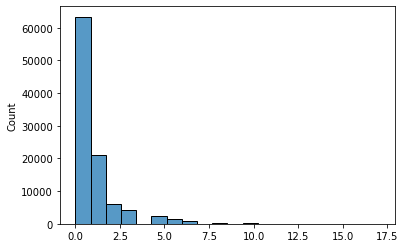

In [84]:
# делаем эксперимент 10 тыс.раз, 
# в каждом из которых по 60 раз будем подбрасывать монету 
# и сохранять возвращаемое значение расстояния хи-квадрат
list_of_chi_square = []
for i in range(100000):
    list_of_chi_square.append(distance_chi_square_from_toss_coin())
import seaborn as sns

sns.histplot(list_of_chi_square, bins = 20);

In [85]:
# посмотрим еще раз на значение, которое мы получали в нашем 
# конкретном наблюдении с выпаданием орла и решки (когда получили 40 орлов!):
exp_eagles = 40
exp_tails = 20
# расчитываем расстояние хи-квадрат Пирсона: 
# ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
res_of_exp_chi_2 = (exp_eagles-30)**2/30 + (exp_tails-30)**2/30

In [86]:
# посмотрим % значений с равным или большим значением нашего конкретного наблюдения:
count_of_result_or_more_like_we_see = 0
for i in list_of_chi_square:
    if i >= res_of_exp_chi_2:
        count_of_result_or_more_like_we_see += 1;
print(count_of_result_or_more_like_we_see)

1337


In [87]:
# % вероятности получить такие расхождения
print('Или с вероятность {:.3f} мы могли получить такое (40 раз!) \
        \nвыпадение орла при 60-ти подбрасываниях честной монеты'.format(count_of_result_or_more_like_we_see / len(list_of_chi_square)))

Или с вероятность 0.013 мы могли получить такое (40 раз!)         
выпадение орла при 60-ти подбрасываниях честной монеты


In [88]:
#from scipy import stats
chi2_down=stats.chi2.cdf(2 , 2) # - (нижняя граница диапазона, число степеней свободы)
chi2_up=stats.chi2.cdf(4 , 2) # - (верхняя граница диапазона, число степеней свободы)
# stats.chi2.cdf() - вероятность попасть в 95%, т.е. значение, обратное p-value (= 1 - p-value)

chi2_interval = chi2_up - chi2_down
print(f'В диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы лежит {chi2_interval:.1%} наблюдений.')

В диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы лежит 23.3% наблюдений.


In [89]:
def checking_probability(df, low_bound, high_bound = None, status = None):
    if high_bound is None:
        if status == 'upper':
            return 1 - stats.chi2.cdf(low_bound , df)
        elif status == 'both':
            return
    else:
        return stats.chi2.cdf(high_bound , df) - stats.chi2.cdf(low_bound , df)

In [90]:
# вероятность получить такое и еще большое отклонение в случае сли верна нулевая гипотеза
# с числом степенями свободы 1 и значением хи -квадрат 6.7
# так как р меньше 0.05 отклоняем нулевую гипотезу
# следовательно обнаружены статистически значимые различия
checking_probability(df = 1, low_bound = 6.7, status = 'upper')

0.009641291128497542

In [91]:
checking_probability(df= 2, high_bound = 4, low_bound = 2)

0.23254415793482963

<div class="alert alert-warning">
<h2> Распределение Хи-квадрат Пирсона </h2>

</div>

Распределение хи-квадрат с k-степенями свободы - это распределение суммы квадратов k независимых стандартных нормальных величин

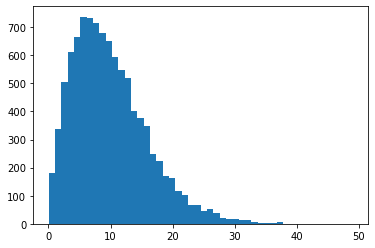

In [92]:
plt.hist(np.array([random.normalvariate(2, 1)**2 + random.normalvariate(2, 1)**2  for i in range(10000)]), bins=48)
plt.show()

Количество степеней свободы = количество переменных -1.

In [93]:
# Критическое значение для Хи квадрата для p-value 0.05
from scipy.stats.distributions import chi2
chi2.ppf(df=2, q=0.95)

5.991464547107979

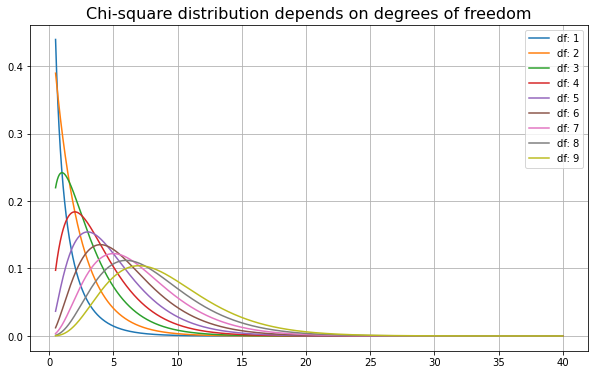

In [94]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0.5, 40, 0.001)
plt.figure(figsize=(10, 6))
#define multiple Chi-square distributions
for i in range(1, 10):
    plt.plot(x, chi2.pdf(x, df=i), label='df: ' + str(i))
#add legend to plot
plt.legend()
plt.title('Сhi-square distribution depends on degrees of freedom', fontsize=16)
plt.grid()
plt.show()

In [95]:
def distance_chi_square_from_toss_coin2( number_of_coin_flips ):
    eagles = 0
    # подбрасываем монету 60 раз
    for i in range(number_of_coin_flips):
        if random.randint(0,1) == 1:
            eagles += 1
    tails = number_of_coin_flips - eagles
    # расчитываем расстояние хи-квадрат Пирсона: 
    # ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
    ones = number_of_coin_flips/2
    return (eagles-ones)/ones**0.5,  (tails-ones)/ones**0.5


In [96]:
def plotting():
    box = []
    for i in list(map(distance_chi_square_from_toss_coin2, [random.randint(10, 100) for i in range(2000)])):
        box.append([i[0], i[1]])
    data = pd.DataFrame(box, columns = ['eagles','tails' ])
    graph= sns.scatterplot(x = 'eagles', y = 'tails', data =data)
    graph.plot([2, 2], [-2, 2], color = 'r')
    graph.plot([-2, -2], [-2, 2], color = 'r')
    graph.plot([2, -2], [2, 2], color = 'r')
    graph.plot([-2, 2], [-2, -2], color = 'r')

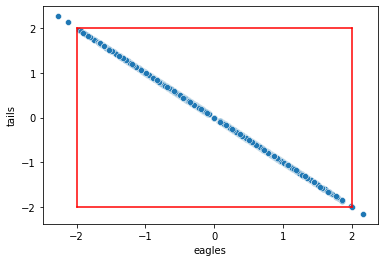

In [97]:
plotting()

In [98]:
box = []
for i in list(map(distance_chi_square_from_toss_coin2, [random.randint(10, 100) for i in range(200)])):
        box.append([i[0], i[1]])
data = pd.DataFrame(box, columns = ['eagles','tails' ])
data['summa'] = data.apply(lambda x: x['eagles']**2 +x['eagles']**2  
                            , axis = 1)

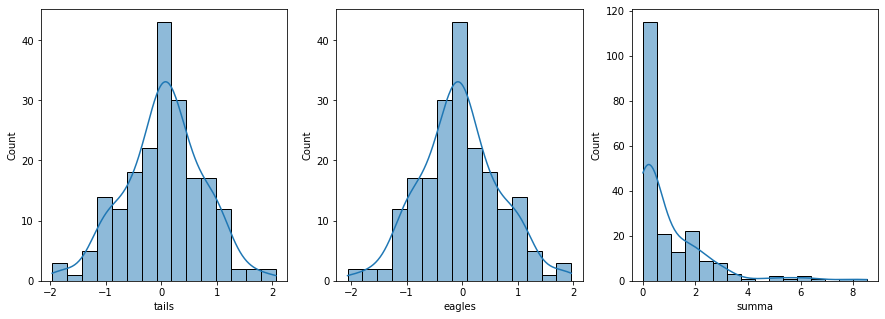

In [99]:
f, axs = plt.subplots(1,3,figsize=(15,5))
for i, dais in enumerate(['tails', 'eagles', 'summa']):
    sns.histplot(data[dais], kde = True, ax = axs[i])

In [100]:
from scipy.stats import shapiro

def shapiro_(y):
    stat, p = shapiro(y)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [101]:
data

,eagles,tails,summa
0,1.000000,-1.000000,2.000000
1,1.220529,-1.220529,2.979381
2,-0.919145,0.919145,1.689655
3,-0.271607,0.271607,0.147541
4,-0.353553,0.353553,0.250000
...,...,...,...
195,0.486664,-0.486664,0.473684
196,0.000000,0.000000,0.000000
197,0.000000,0.000000,0.000000
198,0.000000,0.000000,0.000000


In [102]:
shapiro_(data['tails'])

Statistics=0.993, p=0.498
Sample looks Gaussian (fail to reject H0)


In [103]:
shapiro_(data['eagles'])

Statistics=0.993, p=0.498
Sample looks Gaussian (fail to reject H0)


In [104]:
'''
Теперь рассчитаем p-уровень значимости для нашего примера с игральной костью. 
Напомню, что мы получили следующие значения наблюдаемых частот (от единички до шестерки):

10, 10, 10, 5, 10, 1510,10,10,5,10,15 
'''

'\nТеперь рассчитаем p-уровень значимости для нашего примера с игральной костью. \nНапомню, что мы получили следующие значения наблюдаемых частот (от единички до шестерки):\n\n10, 10, 10, 5, 10, 1510,10,10,5,10,15 \n'

In [105]:
# расстояние хи-квадрат для представленных наблюдений:
observations = [10, 10, 10, 5, 10, 15]
exp = sum(observations) / len(observations)
cal_chi2 = 0
for obs in observations:
    cal_chi2 += (obs-exp)**2/exp
print(cal_chi2)

5.0


In [106]:
# Найдем приближенное распределения хи-квадрат для игральной кости:
list_of_chi2_cdf = []
for i in range(10000):
    # кол-во выпадений каждой грани в наших подбрасываниях
    res = {}
    for j in range(60):
        x = np.random.choice([1,2,3,4,5,6])
        res[x] = res.get(x, 0) + 1
    list_of_chi2_cdf.append(sum([(value-exp)**2/exp for value in res.values()]))

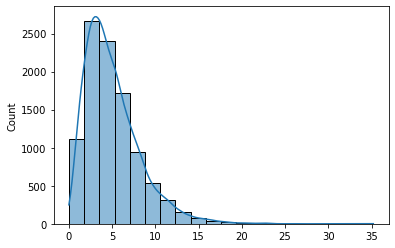

In [107]:
sns.histplot(list_of_chi2_cdf, kde=True, bins=20);

In [108]:
# надем сколько точек больше чем 
p_count = sum(1 for i in list_of_chi2_cdf if i >= cal_chi2)
print(f'{p_count=}, {p_count/10000}')

p_count=4302, 0.4302


In [109]:
# реализация в пакете 
stats.chisquare([10, 10, 10, 5, 10, 15])

Power_divergenceResult(statistic=5.0, pvalue=0.4158801869955079)

<div class="alert alert-warning">
<h2> Анализ таблиц сопряженности </h2>

</div>

Задача: Исследование наличия взаимосвязи между двумя номинативными переменными

H0: Распределение частот не отличимо от ожидаемого

H1: Распределение частот отличимо от ожидаемого, иными словами: номинативные переменные взаимосвязаны между собой

`Минимальное кол-во наблюдений в каждой из ячеек должно быть больше 5`

`Все наблюдения независимы`

Для поиска взаимосвязи между номинативными переменными, применяем критерий $χ²$-Пирсона, который проверяет гипотезу о том, что наблюдаемое распределение номинативной переменной отличается от ожидаемого. 

И рассчитываем p-value со степенями свобод, равными:
$$df = (n - 1) * (m - 1)$$
где $n$ - количество столбцов таблицы, $m$ - количество строк

**Формула для расчета ожидаемых частот** $$f_{ij}= \frac{f_i*f_j}{N}$$


В теории распределение $χ²$ непрерывно, тогда как вычисляемые значения всегда дискретны, в результате H0 может отвергаться слишком часто. Чтобы скорректировать значение p-уровня значимости применяется Поправка Йетса на непрерывность. (Используется для анализа таблицы сопряженности два на два, где значения ожидаемых и наблюдаемых частот в каждой ячейке больше 5, но меньше 10).

$$χ²_{Yates} = \frac{∑ (|f_O - f_E| - 0.5)² }{f_E}$$
где $f_O$ - эмпирическое значение в ячейке, $f_E$ - ожидаемое значение в ячейке



In [110]:
def check_chi(chi2_pvalue):
    if chi2_pvalue > 0.05:
        print('Принять нулевую гипотезу, о том, что распределение частот не отличимо от ожидаемого')
    else:
        print('Отвергунть нулевую гипотезу, о том, что распределение частот не отличимо от ожидаемого')

In [111]:
#from scipy import stats
observed_array = [ [18, 7], [6, 13] ]

chi2_value, p_value, df_value, expected_array = stats.chi2_contingency(observed_array, correction=False) 
# 'correction=True' - поправка Йетса, работает по умолчанию при df=1, поэтому можно
# удалить из формулы и ничего не изменится
check_chi(p_value) 
print(f'Хи-квадрат = {chi2_value:.3f} \np-value = {p_value:.3f} \ndf = {df_value}')
print(f'\nОжидаемые значения:\n{expected_array}')

Отвергунть нулевую гипотезу, о том, что распределение частот не отличимо от ожидаемого
Хи-квадрат = 7.114 
p-value = 0.008 
df = 1

Ожидаемые значения:
[[13.63636364 11.36363636]
 [10.36363636  8.63636364]]


In [112]:
from statsmodels.graphics.mosaicplot import mosaic

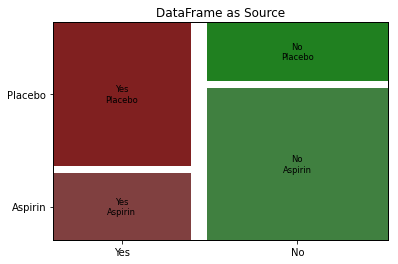

In [113]:
Aspirin = ['Yes'] *6 + ['No'] *18
Placebo = ['Yes'] *13 + ['No'] *7
data = pd.concat([pd.DataFrame({'way': Aspirin, 'name': 'Aspirin'}),
                     pd.DataFrame({'way': Placebo, 'name': 'Placebo'})])
def resid_pearson(x):
    dif_matrix = observed_array - expected_array
    if x['way'] == 'No' and x['name'] == 'Aspirin':
        return dif_matrix[0][0] / np.sqrt(expected_array[0][0])
    elif x['way'] == 'No' and x['name'] == 'Placebo':
        return dif_matrix[0][1]/ np.sqrt(expected_array[0][1])
    elif x['way'] == 'Yes' and x['name'] == 'Aspirin':
        return dif_matrix[1][0]/ np.sqrt(expected_array[1][0])
    else:
        return dif_matrix[1][1]/ np.sqrt(expected_array[1][1])
        

data['residuals'] = data.apply(lambda x: resid_pearson(x), axis =1)
mosaic(data[['way', 'name']], ['way', 'name'], title='DataFrame as Source', gap=0.05)
plt.show()

In [114]:
# встроенная функция для остатков
F = np.array([[18, 7], [6, 13]])                                     
table = sm.stats.Table(F)                                                                            
table.resid_pearson  # Pearson's residuals

array([[ 1.18167831, -1.29446374],
       [-1.35547799,  1.48485174]])

In [115]:
# встроенная функция для остатков
table.standardized_resids  # Standardized residuals

array([[ 2.66722801, -2.66722801],
       [-2.66722801,  2.66722801]])

In [116]:
# пример реализации с цветами
from itertools import product
tuples = list(product(['Placebo', 'Aspirine'], ['Yes', 'No']))
index = pd.MultiIndex.from_tuples(tuples)
data = pd.Series([18,7,6,13], index=index)

In [117]:
# Импорт необходимых модулей

import matplotlib.patches as mpatches


def make_me_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = stats.chi2_contingency(obs)
    remains = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 7).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))

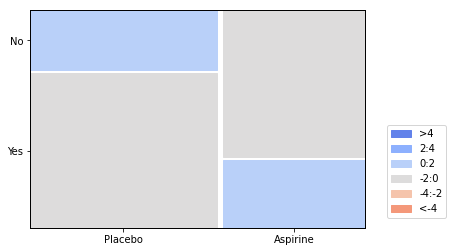

In [118]:
make_me_plot(data)

Если значения стандартизированных остатков больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения.


<div class="alert alert-warning">
<h2> Точный критерий Фишера </h2>

</div>

- При анализе четырехпольных таблиц ожидаемые значения в каждой из ячеек должны быть не менее 10. В том случае, если хотя бы в одной ячейке ожидаемое явление принимает значение от 5 до 9, критерий хи-квадрат должен рассчитываться с поправкой Йейтса. 
- Если хотя бы в одной ячейке ожидаемое явление меньше 5, то для анализа должен использоваться точный критерий Фишера.
- В случае анализа многопольных таблиц ожидаемое число наблюдений не должно принимать значения менее 5 более чем в 20% ячеек.

In [119]:
#from scipy import stats
odds_ratio, p_value = stats.fisher_exact([[1, 3], [3, 1]])  # odds_ratio - отношение шансов

print(p_value)

0.48571428571428527


In [120]:
# пример реализации
def C(n, k):
     return math.factorial(n) / (math.factorial(k) * math.factorial(n - k ))

def p(a, b, c, d):
    n = a + b + c + d
    numerator = math.factorial(a + b) * math.factorial(c + d)* math.factorial(a + c)* math.factorial(b+ d)
    denominator = math.factorial(a)*math.factorial(b)*math.factorial(c)*math.factorial(d)*math.factorial(n)
    
    return numerator/denominator

(p(1, 3, 3, 1)+p(4, 0, 0, 4))*2

0.4857142857142857

<div class="alert alert-warning">
<h2> Логистическая регрессия. Постановка задачи. </h2>

</div>

Логистическая регрессия используется для исследования взаимосвязи между номинативной зависимой переменной, имеющей всего 2 градации, и различными независимыми переменными (в качестве предикторов могут быть как номинативные, так и количественные переменные).
Номинативную переменную с двумя градациями можно представить как два зависимых друг от друга вероятностных исхода, равных p и (1 - p).
Тогда регрессионная модель, в которой зависимая переменная — это номинативная переменная с двумя градациями:

Odds (шансы)$ = \frac{p}{1 - p}$ - это отношение вероятности успеха (p) к вероятности неудачи (1 - p) , ∈ [0; +∞)

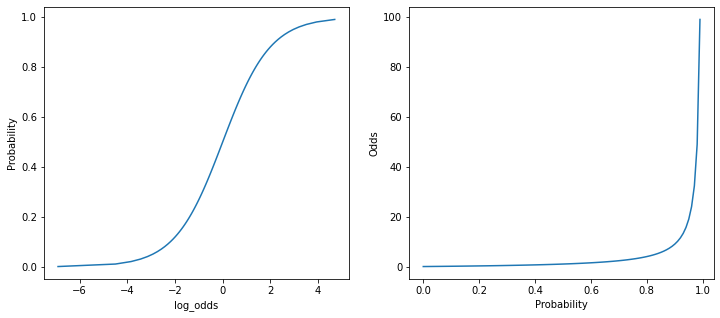

In [121]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.lineplot(y = [i for i in np.arange(0.001, 1, 0.01)],
         x = [np.log(i/(1 - i)) for i in np.arange(0.001, 1, 0.01)] , ax = axes[0])
axes[0].set_xlabel('log_odds')
axes[0].set_ylabel('Probability')

sns.lineplot(x = [i for i in np.arange(0, 1, 0.01)],
         y = [i/(1 - i) for i in np.arange(0, 1, 0.01)] , ax = axes[1])
axes[1].set_xlabel('Probability')
axes[1].set_ylabel('Odds')
plt.show()

Если извлечь логарифм из числа меньше 1, то получим отрицательное значение. Значит если шанс меньше 1, то и вероятность меньше 0.5

In [122]:
# Предположим, что мы получили логарифм шансов выпадения решки, равный -1. Тогда вероятность выпадения решки равняется:
math.exp(-1) / (1 + math.exp(-1))

0.2689414213699951

<div class="alert alert-warning">
<h2> Модель без предикторов. Intercept only model </h2>

</div>

**Intercept** - натуральный логарифм шансов положительного исхода (все положительные делятся на все отрицательные исходы). И свободный член логистической регресии.

 $$intercept = ln\frac{p}{1-p} $$
 Т.е. Логарифм шанса положительного исхода


H0: Нет никакой разницы между исходом №1 и исходом №2 и нормальное распределение описывает распределение коэффициентов логистической регрессии:

In [144]:
dataset = pd.read_csv('titanik_full_data.csv', sep = '\t')
dataset['intercept'] = 1
# dict ={'male':0, "female":1}
# dataset['Sex']= dataset['Sex'].map(dict)
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,intercept
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [145]:
# первый вараинт реализации через Logit Regression Results

In [146]:
logit_model = sm.Logit(dataset['Survived'].values, dataset['intercept'].values).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.662771
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1308
Method:                           MLE   Df Model:                            0
Date:                Mon, 02 Aug 2021   Pseudo R-squ.:               1.350e-10
Time:                        23:41:32   Log-Likelihood:                -867.57
converged:                       True   LL-Null:                       -867.57
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5007      0.057     -8.780      0.000      -0.612      -0.389


- Estimate - значение intercept (логарифма шансов)
- std.Error - это стандартное отклонение, которое имело бы нормальное распределение коэфициента intercept со средним равным 0
- z-value =  $\frac{intercept}{std.Error}$ – расстояние до 0 в стандартных отклонениях.
- Pr(>|z|) - значение p-value, т.е. вероятность получить такое или ещё более сильное отличие intercept от 0 при условии, что верна нулевая гипотеза
1
'''

P < 0.05 для свободного члена логистической регрессии означает, что:
 - Распределение исходов в нашей выборке значимо отличается от равномерного
 - Вероятности двух исходов зависимой переменной значимо различаются между собой

In [147]:
# второй вараинт реализации через биномиальная регрессия

In [148]:
logit_res = smf.glm('Survived ~ 1', dataset, family = sm.families.Binomial()).fit()
print(logit_res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                 1309
Model:                            GLM   Df Residuals:                     1308
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -867.57
Date:                Mon, 02 Aug 2021   Deviance:                       1735.1
Time:                        23:41:33   Pearson chi2:                 1.31e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5007      0.057     -8.780      0.0

In [149]:
print(f'то есть вероятность выжить случайного человека в этой модели {math.exp( -0.5007)}')

то есть вероятность выжить случайного человека в этой модели 0.6061062368161789


In [150]:
# Значение интерсепта можно получить, если найти шанс выживания и вычислить из него логарифм
dataset['Survived'].value_counts()
math.log(494/(815))

-0.5006525960529401

In [151]:
'''
С помощью логистической регрессии без предикторов мы захотели узнать, правда ли, что \
сдавая Анатолию Дмитриевичу, легче провалить экзамен, чем сдать. В нашей выборке было 50 студентов. \
Часть из них сдала экзамен (положительный исход), а часть - нет (отрицательный исход). Свободный член \
нашей регрессии оказался равен -0.8472979. Сколько человек всё-таки сдало экзамен?
Введите численный ответ

'''


# расчет шансов
math.exp( -0.8472979)

# расчет вероятности
math.exp(-0.8472979)/(1+math.exp(-0.8472979))*50

14.999999584065643

<div class="alert alert-warning">
<h2> Модель с одним номинативным предиктором </h2>

</div>

In [152]:
logit_res2 = smf.glm('Survived ~ Sex', dataset, family = sm.families.Binomial()).fit()
print(logit_res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                 1309
Model:                            GLM   Df Residuals:                     1307
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -539.84
Date:                Mon, 02 Aug 2021   Deviance:                       1079.7
Time:                        23:41:35   Pearson chi2:                 1.31e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.5588      0.122     12.752      

Смотрим какой градачии фактора предиктора нет среди коэфициентов, чтобы интерпретировать на основании этого intercept

Intercept - натуральный логарифм шансов положительного исхода для женшин 

Коэффициент при SexMale - логарифм отношения шансов положительного исхода для мужчие деленного на шансы положительного исходя для женщин ( так как коэффициент мужчина вероятность выжить у него сильно снижается)

In [153]:
dataset.pivot_table(index = 'Survived',columns = 'Sex', aggfunc = {'PassengerId':'count'}) \
       .reset_index()

Survived PassengerId     
Sex               female male
0          0          81  734
1          1         385  109

In [154]:
# интерсепт - это шанс выжить для женщин
np.log(385/81)

1.5587941796153455

In [155]:
# Sex[T.male] - это отношение шансов выжить у мужчин к жансам выжить у женщин
# Intercept + SexMale = log(odds_male)
# SexMale = log(odds_male) - Intercept = log(odds_male) - log(odds_female) = log(odds_male / odds_female)
np.log((109/734) /(385/81))

-3.465955326000717

Т.к. переменные Female и Male зависимы друг от друга (мультиколлинеарны), разумно в построении модели использовать только одну из них (любую, у нас выбраны женщины, просто по алфавиту), а вторую назначить значением intercept. Поэтому, смотрим, какой градации-предиктора нет среди коэффициентов, это и будет intercept

Еще раз: это эффект из-за полной мультиколиарности, так как всегда 0 + 1 = 1

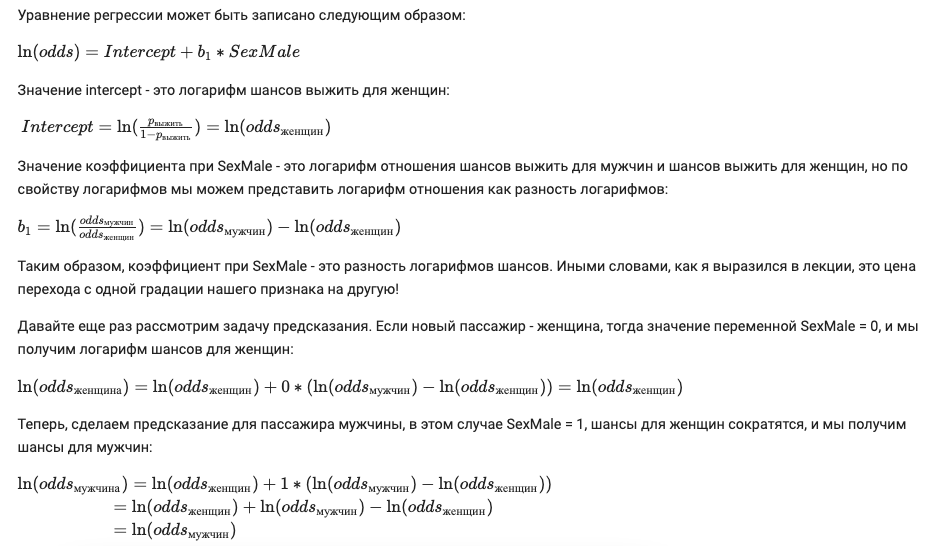

In [156]:
Image(filename='фото//output12.png')

In [157]:
def calculate_nested_f_statistic(small_model, big_model):
    """Given two fitted GLMs, the larger of which contains the parameter space of the smaller, return the F Stat and P value corresponding to the larger model adding explanatory power"""
    addtl_params = big_model.df_model - small_model.df_model
    f_stat = (small_model.deviance - big_model.deviance) / (addtl_params * big_model.scale)
    df_numerator = addtl_params
    # use fitted values to obtain n_obs from model object:
    df_denom = (big_model.fittedvalues.shape[0] - big_model.df_model)
    p_value = stats.f.sf(f_stat, df_numerator, df_denom)
    return (f_stat, p_value)

In [158]:
# Using function defined in answer:
F, p = calculate_nested_f_statistic(logit_res, logit_res2)
# (9.519052917304652, 0.004914748992474178)

In [159]:
print('Принимаем H0, так как не получили значимых отклонений и  p>0.05' \
          if p>0.05 else 'Оклоняем H0, так как получили значимые отклонения и  p<0.05')

Оклоняем H0, так как получили значимые отклонения и  p<0.05


<div class="alert alert-warning">
<h2> Модель с двумя номинативными предикторами </h2>

</div>


In [160]:
dict ={1:'первый', 2:'второй', 3:'третий'}
dataset['Pclass']= dataset['Pclass'].map(dict)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   object 
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  intercept    1309 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [161]:
multi_res = smf.mnlogit('Survived ~ Sex * Pclass', dataset).fit_regularized()
print(multi_res.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.371717990941701
            Iterations: 45
            Function evaluations: 45
            Gradient evaluations: 45
                          MNLogit Regression Results                          
Dep. Variable:               Survived   No. Observations:                 1309
Model:                        MNLogit   Df Residuals:                     1303
Method:                           MLE   Df Model:                            5
Date:                Mon, 02 Aug 2021   Pseudo R-squ.:                  0.4391
Time:                        23:41:39   Log-Likelihood:                -486.58
converged:                       True   LL-Null:                       -867.57
Covariance Type:            nonrobust   LLR p-value:                1.943e-162
                  Survived=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [170]:
# Sex[T.male]:Pclass[T.первый] = 

# log( шансы мужчин во втором классе / шансы женщин в втором классе ) минус
# log( шансы мужчин в перовом классе / шансы женщин в перовом классе )

Intercept = 0.5
DrugsDrug2 = 1.0
SexMale = 4.0



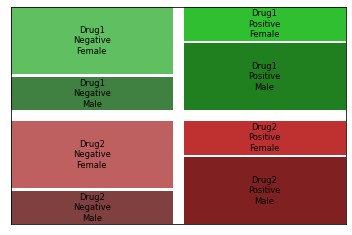

In [168]:
from statsmodels.graphics.mosaicplot import mosaic


data = {
    ('Drug2', 'Negative', 'Male'  ): 1,
    ('Drug2', 'Positive', 'Male'  ): 2,
    ('Drug2', 'Negative', 'Female'): 2,
    ('Drug2', 'Positive', 'Female'): 1,
           
    ('Drug1', 'Negative', 'Male'  ): 1,
    ('Drug1', 'Positive', 'Male'  ): 2,
    ('Drug1', 'Negative', 'Female'): 2,
    ('Drug1', 'Positive', 'Female'): 1,
}

ax = mosaic(data, horizontal=0, gap=.05, axes_label=0)

odds_F_Pos_Drug1 = data[('Drug1', 'Positive', 'Female')] / \
                   data[('Drug1', 'Negative', 'Female')]
odds_F_Neg_Drug1 = 1 / odds_F_Pos_Drug1
odds_M_Pos_Drug1 = data[('Drug1', 'Positive', 'Male')] / \
                   data[('Drug1', 'Negative', 'Male')]
odds_M_Neg_Drug1 = 1 / odds_M_Pos_Drug1
odds_F_Pos_Drug2 = data[('Drug2', 'Positive', 'Female')] / \
                   data[('Drug2', 'Negative', 'Female')]

print(f'Intercept = {odds_F_Pos_Drug1}')
print(f'DrugsDrug2 = {odds_F_Pos_Drug2 / odds_F_Pos_Drug1}')
print(f'SexMale = {odds_M_Pos_Drug1 / odds_F_Pos_Drug1}')
print()